In [14]:
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
from config import ( consumer_key,
                     consumer_secret, 
                     access_token, 
                     access_token_secret)

import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [15]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [16]:
news_outlets = ['NYT', 'CNN', 'BBC','CBS', 'fox' ]
#news_outlets = ['nytimes' ]

In [17]:
# Array of news outlets
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    # Target User

   
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    
    i = 0
    for tweet in public_tweets:
        #print(tweet)
       
        tweet_text = tweet["text"]
       
    #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("../Homework/twitter.csv")

In [18]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='NYT']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='NYT']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


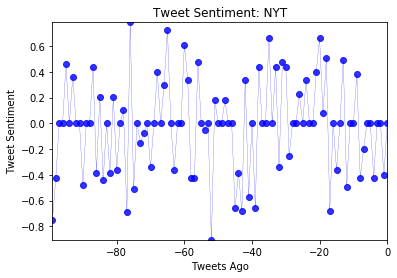

In [19]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'NYT')
plt.savefig("../Homework/NYT.png")

plt.show()

In [20]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


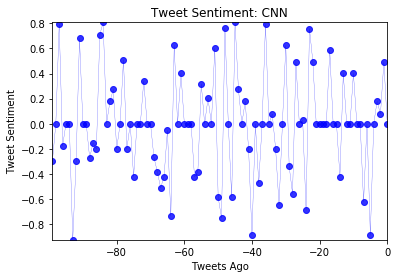

In [21]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CNN')
plt.savefig("../Homework/CNN.png")

plt.show()

In [22]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


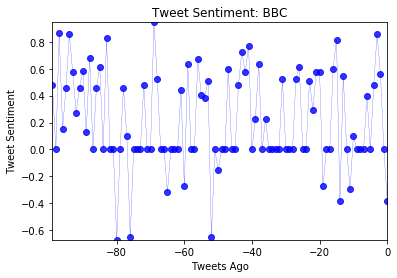

In [23]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'BBC')
plt.savefig("../Homework/BBC.png")

plt.show()

In [24]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


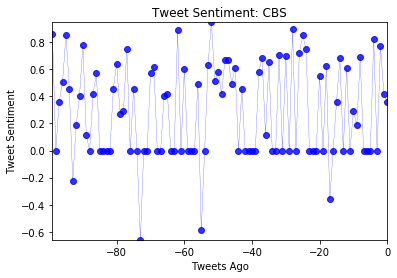

In [25]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CBS')
plt.savefig("../Homework/CBS.png")

plt.show()

In [26]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


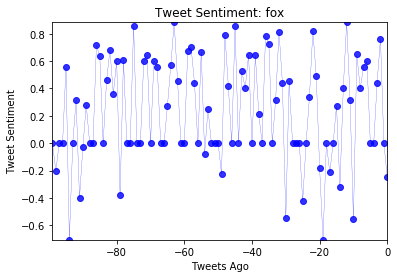

In [27]:
# Plot Time Between Twets
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'fox')
plt.savefig("../Homework/fox.png")

plt.show()

In [28]:
#  Bar plot visualizing the _overall_ sentiments 
overall_sent = []
for target_outlet in news_outlets:
    print(target_outlet)
    tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media==target_outlet]['compound']
    overall_sent.append(np.mean(tweet_compound))
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
print(overall_sent)

NYT
CNN
BBC
CBS
fox
[-0.020218000000000003, -0.003045999999999995, 0.21102499999999996, 0.29569599999999996, 0.23156500000000002]


In [45]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='NYT']['tweets_ago']
nytimes=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='NYT']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
cnn=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors="brown", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
bbc=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
plt.scatter(tweets_ago, bbc, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
cbs=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
plt.scatter(tweets_ago, cbs, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
plt.scatter(tweets_ago, fox, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)

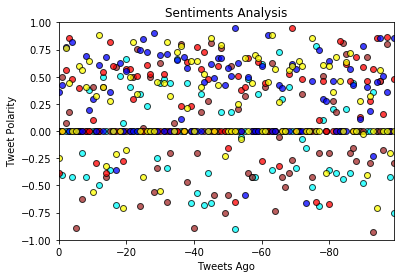

In [46]:


plt.title("Sentiments Analysis")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


x_limit = np.min(tweets_ago)

plt.ylim(-1, 1)
plt.xlim(0, x_limit)
plt.xlim(0, x_limit)
plt.savefig("../Homework/moods_bar.png")
plt.show()

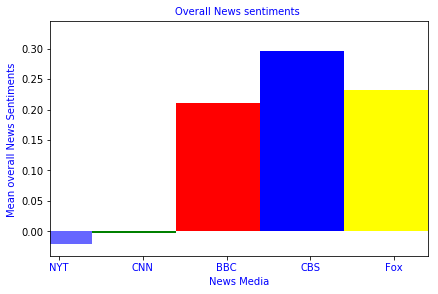

In [47]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sent[0], facecolor='blue', alpha=0.6, align="center",width=1.0)
plt.bar(1, overall_sent[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sent[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sent[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sent[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["NYT","CNN","BBC", "CBS", "Fox"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(min(overall_sent)-0.02, max(overall_sent)+0.05)

plt.title("Overall News sentiments ", fontsize=10, color='blue')
plt.xlabel("News Media", fontsize=10, color='blue')
plt.ylabel("Mean overall News Sentiments ", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)

plt.show()